# Sales Analysis

## Import necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

## Task 1: Merge the 12 months of sales data into a single file

In [18]:
dataframes = []
for month in range(1, 13):
    month_name = calendar.month_name[month]
    dataframe = pd.read_csv(f".\\Month_Sales\\Sales_{month_name}_2019.csv")
    dataframes.append(dataframe)
sales_df = pd.concat(dataframes)

sales_df.to_csv(".\\Full_Sales_Data\sales_data.csv", index=False)


## Task 2: Read the new merged sales data


In [19]:
sales = pd.read_csv('.\\Full_Sales_Data\\sales_data.csv')
sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
173708,311569,Bose SoundSport Headphones,1,99.99,12/19/19 19:57,"411 12th St, Portland, OR 97035"
173709,311570,AA Batteries (4-pack),1,3.84,12/21/19 10:43,"598 14th St, San Francisco, CA 94016"
173710,311571,Bose SoundSport Headphones,1,99.99,12/31/19 18:20,"974 Church St, Portland, OR 97035"
173711,311572,Lightning Charging Cable,1,14.95,12/30/19 06:57,"326 2nd St, Portland, ME 04101"
173712,311573,Wired Headphones,1,11.99,12/09/19 21:58,"643 2nd St, New York City, NY 10001"


## Task 3: Clean up data

In [20]:
# Drop rows of NAN
sales.dropna(axis=0, how='all', inplace=True)

# Drop rows which contain values same as column names
sales = sales[(sales != sales.columns).all(axis=1)]


## Add Month Column to the Dataframe

In [21]:
sales['Month'] = sales['Order Date'].str[0:2]

# # Remove leading zeros
sales['Month'] = sales['Month'].str.lstrip('0')

# Convert from string to integer
sales['Month'] = sales['Month'].astype('int32')

# Replace month number with month name
sales['Month'] = sales['Month'].apply(lambda x: calendar.month_abbr[x])
sales['Month']

0         Jan
1         Jan
2         Jan
3         Jan
4         Jan
         ... 
173708    Dec
173709    Dec
173710    Dec
173711    Dec
173712    Dec
Name: Month, Length: 172872, dtype: object

## Save Clean Data

In [22]:
sales.to_csv(".\\Full_Sales_Data\\clean_data.csv", index=False)

## Read clean data

In [23]:
df = pd.read_csv(".\\Full_Sales_Data\\clean_data.csv")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,Lightning Charging Cable,1,14.95,01/19/19 10:13,"231 6th St, Atlanta, GA 30301",Jan
1,141235,USB-C Charging Cable,1,11.95,01/15/19 14:10,"148 Meadow St, Boston, MA 02215",Jan
2,141236,Lightning Charging Cable,1,14.95,01/20/19 11:21,"850 Walnut St, San Francisco, CA 94016",Jan
3,141237,USB-C Charging Cable,2,11.95,01/15/19 00:11,"479 11th St, San Francisco, CA 94016",Jan
4,141238,Lightning Charging Cable,1,14.95,01/06/19 10:05,"654 5th St, Dallas, TX 75001",Jan
5,141239,20in Monitor,1,109.99,01/25/19 09:57,"826 4th St, New York City, NY 10001",Jan
6,141240,AA Batteries (4-pack),1,3.84,01/12/19 20:39,"343 Pine St, Dallas, TX 75001",Jan
7,141241,Lightning Charging Cable,1,14.95,01/31/19 15:19,"556 Highland St, Los Angeles, CA 90001",Jan
8,141242,AAA Batteries (4-pack),1,2.99,01/04/19 01:19,"892 8th St, Atlanta, GA 30301",Jan
9,141243,ThinkPad Laptop,1,999.99,01/21/19 11:23,"232 Hickory St, Boston, MA 02215",Jan


## Add Sales Column to Dataframe

In [24]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,Lightning Charging Cable,1,14.95,01/19/19 10:13,"231 6th St, Atlanta, GA 30301",Jan,14.95
1,141235,USB-C Charging Cable,1,11.95,01/15/19 14:10,"148 Meadow St, Boston, MA 02215",Jan,11.95
2,141236,Lightning Charging Cable,1,14.95,01/20/19 11:21,"850 Walnut St, San Francisco, CA 94016",Jan,14.95
3,141237,USB-C Charging Cable,2,11.95,01/15/19 00:11,"479 11th St, San Francisco, CA 94016",Jan,23.90
4,141238,Lightning Charging Cable,1,14.95,01/06/19 10:05,"654 5th St, Dallas, TX 75001",Jan,14.95
...,...,...,...,...,...,...,...,...
172867,311569,Bose SoundSport Headphones,1,99.99,12/19/19 19:57,"411 12th St, Portland, OR 97035",Dec,99.99
172868,311570,AA Batteries (4-pack),1,3.84,12/21/19 10:43,"598 14th St, San Francisco, CA 94016",Dec,3.84
172869,311571,Bose SoundSport Headphones,1,99.99,12/31/19 18:20,"974 Church St, Portland, OR 97035",Dec,99.99
172870,311572,Lightning Charging Cable,1,14.95,12/30/19 06:57,"326 2nd St, Portland, ME 04101",Dec,14.95


## Question 1: What was the best month for sales? How much was earned that month?

In [25]:
df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

Month
Dec    5001912.93
Nov    4003568.82
May    2948896.17
Jun    2726517.08
Sep    2721494.12
Apr    2709242.23
Feb    2226684.34
Jul    2110525.65
Oct    2041880.38
Aug    1891162.37
Jan    1801749.66
Mar    1785675.31
Name: Sales, dtype: float64

## Convert Month back to Month Number for Visualization

In [26]:
df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, "%b").month)

## Visualize Sales by Month

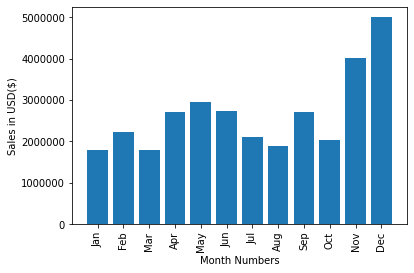

In [27]:
results = df.groupby('Month')['Sales'].sum()
numbers = np.arange(1,13)
months = list(map(lambda x: calendar.month_abbr[x], numbers))

fig, ax = plt.subplots()
ax.bar(numbers, results)
ax.ticklabel_format(style='plain')
plt.xticks(numbers, months, rotation='vertical')
plt.xlabel('Month Numbers')
plt.ylabel('Sales in USD($)')
plt.show()

## Add a city column by getting the city name from purchase address

In [28]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,Lightning Charging Cable,1,14.95,01/19/19 10:13,"231 6th St, Atlanta, GA 30301",1,14.95,Atlanta (GA)
1,141235,USB-C Charging Cable,1,11.95,01/15/19 14:10,"148 Meadow St, Boston, MA 02215",1,11.95,Boston (MA)
2,141236,Lightning Charging Cable,1,14.95,01/20/19 11:21,"850 Walnut St, San Francisco, CA 94016",1,14.95,San Francisco (CA)
3,141237,USB-C Charging Cable,2,11.95,01/15/19 00:11,"479 11th St, San Francisco, CA 94016",1,23.90,San Francisco (CA)
4,141238,Lightning Charging Cable,1,14.95,01/06/19 10:05,"654 5th St, Dallas, TX 75001",1,14.95,Dallas (TX)
...,...,...,...,...,...,...,...,...,...
172867,311569,Bose SoundSport Headphones,1,99.99,12/19/19 19:57,"411 12th St, Portland, OR 97035",12,99.99,Portland (OR)
172868,311570,AA Batteries (4-pack),1,3.84,12/21/19 10:43,"598 14th St, San Francisco, CA 94016",12,3.84,San Francisco (CA)
172869,311571,Bose SoundSport Headphones,1,99.99,12/31/19 18:20,"974 Church St, Portland, OR 97035",12,99.99,Portland (OR)
172870,311572,Lightning Charging Cable,1,14.95,12/30/19 06:57,"326 2nd St, Portland, ME 04101",12,14.95,Portland (ME)


## Rearrange columns

In [29]:
df = df.reindex(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Month', 'Purchase Address', 'City', 'Sales'], axis=1)

## What city had the highest number of sales

In [30]:
df.groupby('City')['Sales'].sum()

City
 Atlanta (GA)          2606037.74
 Austin (TX)           1780002.98
 Boston (MA)           3388519.28
 Dallas (TX)           2507597.55
 Los Angeles (CA)      5111159.52
 New York City (NY)    4348068.27
 Portland (ME)          421155.79
 Portland (OR)         1709189.06
 San Francisco (CA)    7634426.16
 Seattle (WA)          2463152.71
Name: Sales, dtype: float64

## Visualize Sales by City

Text(0, 0.5, 'Sales in USD($)')

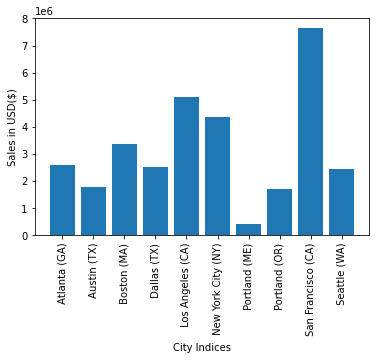

In [31]:
results = df.groupby('City')['Sales'].sum()
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, results)
plt.xticks(cities, rotation='vertical')
plt.xlabel('City Indices')
plt.ylabel('Sales in USD($)')

# plt.figure(figsize=(8, 5))
# ax = sns.pointplot(x='City', y='Sales', data=df, palette='rainbow')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## What time should we display advertisements to maximise likelihood of customer's buying a product?

11914
724


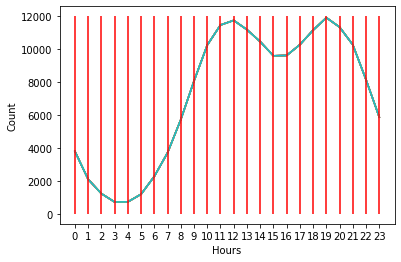

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Hours'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute

# Maximum rows_count grouped by hours
max_row_count = df.groupby('Hours')['Hours'].count().max()
print(max_row_count)

# Minimum rows count grouped by hours
min_row_count = df.groupby('Hours')['Hours'].count().min()
print(min_row_count)

results = df.groupby('Hours').count()
hours = [hour for hour, df in df.groupby('Hours')]
xlines = np.arange(0, 24)
plt.plot(hours, results)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.vlines(xlines, 0, 12000, linestyles='solid', colors='red') # or just use plt.grid()
plt.show()

# 21PM-10AM is the least used hour by customer to place orders
# 11AM-12PM or 6PM-7PM is the most used hour by customers to place orders. So that's best time to display advertisements


## Which products were sold together the most?

In [33]:
# Retrieve rows with duplicated order id
new_df = df[df['Order ID'].duplicated(keep=False)]

# Create a new Grouped Data column and store products whose order id is the same by joining them together
new_df['Grouped Products'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Drop duplicates
new_df = new_df[['Order ID', 'Grouped Products']].drop_duplicates()

# Count the combinations of row_list having 2 products only
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Top 5 pair of products sold the most
count.most_common(5) 

C:\Users\WebMagic\AppData\Local\Temp\ipykernel_3052\2679541713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped Products'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


[(('iPhone', 'Lightning Charging Cable'), 1011),
 (('Google Phone', 'USB-C Charging Cable'), 911),
 (('iPhone', 'Wired Headphones'), 476),
 (('Google Phone', 'Wired Headphones'), 387),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 350)]

C:\Users\WebMagic\AppData\Local\Temp\ipykernel_3052\1955246359.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


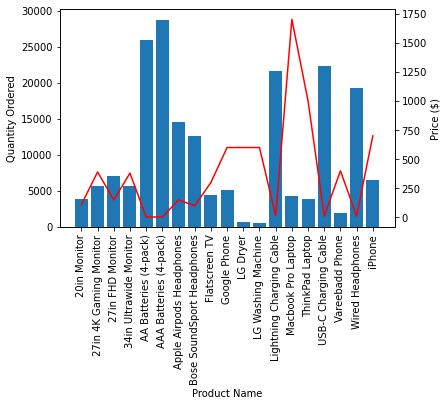

In [34]:
quantities = df.groupby('Product')['Quantity Ordered'].sum()
products = [product for product, df in df.groupby('Product')]
prices = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantities)
ax2.plot(products, prices, 'r')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_xticklabels(products, rotation='vertical')
plt.show()

# When the quantity is high, the price is low